<a href="https://colab.research.google.com/github/JawadNayosh/Airbnb-Insights-Dashboard_-Tableau-Project/blob/main/An_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Put your name and student ID here**

Name: Mohammad Jawad Nayosh

Student ID: T01242238


**Summary**
This project aimed to predict median house values in California districts using various features. I explored the dataset, visualized geographical data, prepared the data for machine learning, trained several models, and evaluated their performance. The final visualization highlighted the geographical distribution of median house values and the predicted values generated by your chosen model.


# Python Environment

install python packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/ANLY 6110_ II/Module 4 Training Model /M4P2 EtE Machine Learning Project"

/content/drive/MyDrive/ANLY 6110_ II/Module 4 Training Model /M4P2 EtE Machine Learning Project


In [ ]:
%ls

cb_2023_us_state_500k.zip                                  housing.csv
Ch2_An_end_to_end_machine_learning_project_finisher.ipynb  map/


In [ ]:
%pwd

'/content/drive/MyDrive/ANLY 6110_ II/Module 4 Training Model /M4P2 EtE Machine Learning Project'

In [ ]:
%pip install geopandas
%pip install contextily
%pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.9 MB/s eta 0:00:00


import python packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx
import mapclassify as mc

## Load the Data

In [ ]:
housing = pd.read_csv("/content/drive/MyDrive/ANLY 6110_ II/Module 4 Training Model /M4P2 EtE Machine Learning Project/housing.csv")

In [ ]:
us_gdf = gpd.read_file('/content/drive/MyDrive/ANLY 6110_ II/Module 4 Training Model /M4P2 EtE Machine Learning Project/map/cb_2023_us_state_500k.shp')

## Take a Quick Look at the Data Structure

In [ ]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

This data includes metrics such as the population, median income, and median housing price for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). I will call them “districts” for short.
Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.


In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by machine learning standards, but it’s perfect to get started. We also notice that the total_bedrooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will need to take care of this later.

All attributes are numerical, except for ocean_proximity. Its type is object, so it could hold any kind of Python object. But since we loaded this data from a CSV file, we know that it must be a text attribute. When we looked at the top five rows,we notice that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute. We can find out what categories exist and how many districts belong to each category by using the value_counts() method:

In [ ]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
new_table = housing[["population","median_income","ocean_proximity"]].copy()
new_table

population  median_income ocean_proximity
0           322.0         8.3252        NEAR BAY
1          2401.0         8.3014        NEAR BAY
2           496.0         7.2574        NEAR BAY
3           558.0         5.6431        NEAR BAY
4           565.0         3.8462        NEAR BAY
...           ...            ...             ...
20635       845.0         1.5603          INLAND
20636       356.0         2.5568          INLAND
20637      1007.0         1.7000          INLAND
20638       741.0         1.8672          INLAND
20639      1387.0         2.3886          INLAND

[20640 rows x 3 columns]

In [ ]:
c = housing["total_rooms"] # let us have a look to same data, let us check room destributions
c

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

## Create a Test Set

In [ ]:
c = housing["ocean_proximity"]
vc = c.value_counts()
vc

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

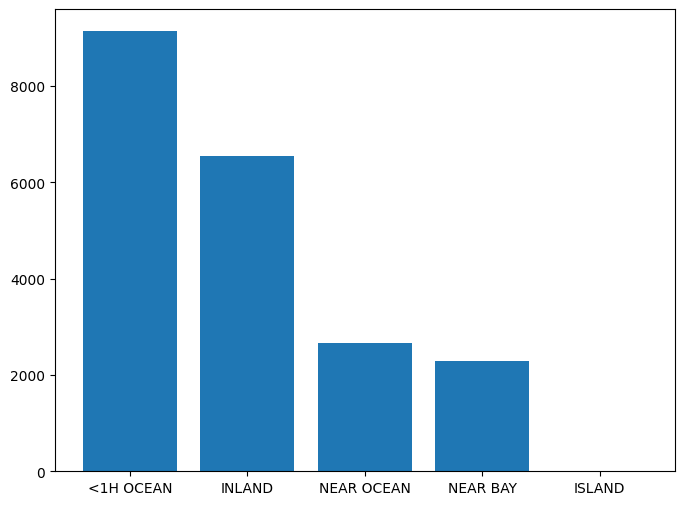

In [ ]:
fig = plt.figure(figsize= (8,6))
ax1 =plt.subplot(1,1,1)
plt.bar(vc.index, vc.values)
plt.show

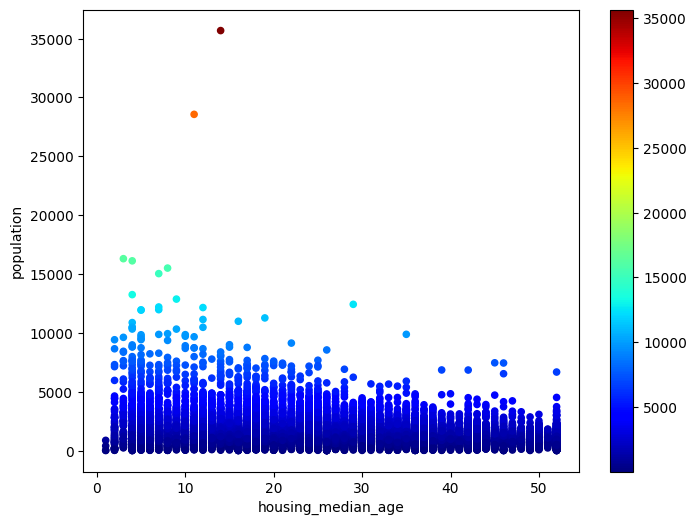

In [ ]:
fig =plt.figure(figsize= (8,6))
ax1 =plt.subplot(1,1,1)
plt.scatter(housing['housing_median_age'],housing['population'], c= housing['population'],s=20, cmap='jet') # removed plt.style
plt.colorbar()
plt.xlabel('housing_median_age')
plt.ylabel('population')
plt.show()




Looks like the majority of populaiton are living in the houses with 0-10 years of age. The oder the houses, the less popluation are living there.

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

To check for correlation between attributes we need to use the Pandas scatter_matrix() function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, we would get 112 = 121 plots, which would not fit on a page—so we decided to focus on a few promising attributes that seem most correlated with the median housing value

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

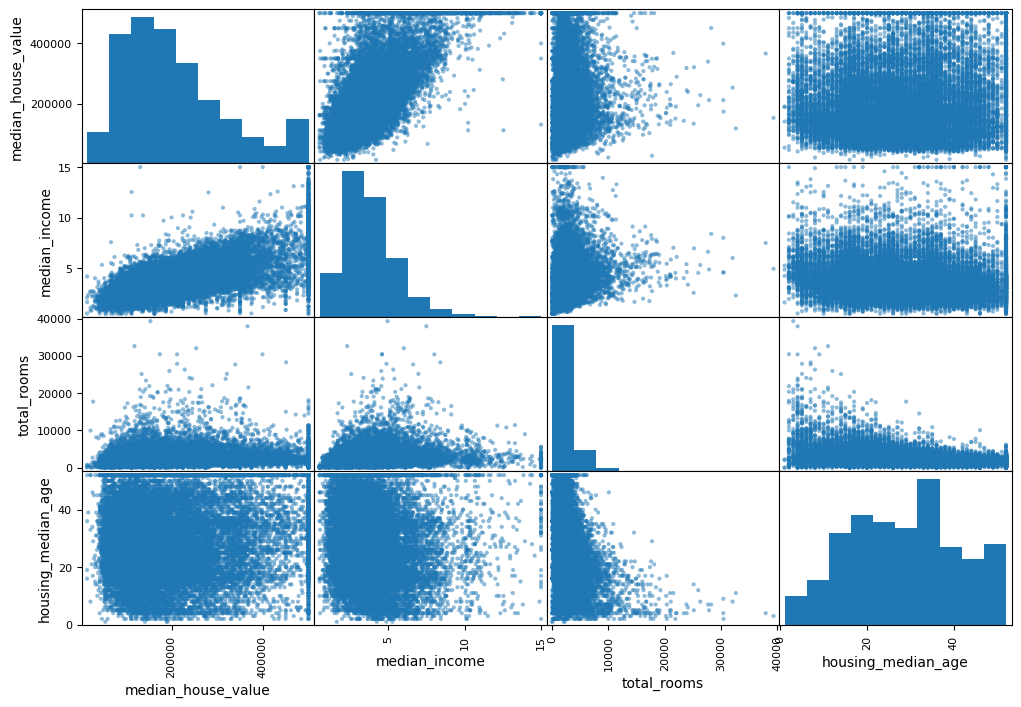

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


Looking at the correlation scatterplots, it seems like the most promising attribute to predict the median house value is the median income, so let us zoom in its scatterplot

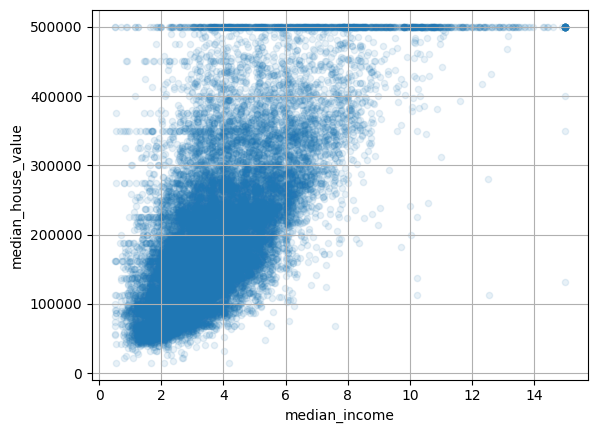

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()


This plot reveals that the correlation is indeed quite strong; we can clearly see the upward trend, and the points are not too dispersed. Also, the price cap we noticed earlier is clearly visible as a horizontal line at $500,000. But the plot also reveals other less obvious straight lines: a horizontal line around $450,000, another around $350,000, perhaps one around $280,000, and a few more below that. We may want to try removing the corresponding districts to prevent our algorithms from learning to reproduce these data quirks.

## Visualizing Geographical Data

In [ ]:
# Next let show our scatter plot on the map
us_gdf.head(5) #this is our map's data, let us change the index

STATEFP   STATENS      GEOIDFQ GEOID STUSPS          NAME LSAD  \
STUSPS                                                                  
NM          35  00897535  0400000US35    35     NM    New Mexico   00   
SD          46  01785534  0400000US46    46     SD  South Dakota   00   
CA          06  01779778  0400000US06    06     CA    California   00   
KY          21  01779786  0400000US21    21     KY      Kentucky   00   
AL          01  01779775  0400000US01    01     AL       Alabama   00   

               ALAND       AWATER  \
STUSPS                              
NM      314198587197    726463919   
SD      196341525171   3387709166   
CA      403673296401  20291770234   
KY      102266598312   2384223544   
AL      131185049346   4582326383   

                                                 geometry  
STUSPS                                                     
NM      POLYGON ((-109.05017 31.48, -109.04984 31.4995...  
SD      POLYGON ((-104.05788 44.9976, -104.05078 44.99...  
CA      MULTIPOLYGON (((-118.60442 33.47855, -118.5987...  
KY      MULTIPOLYGON (((-89.40565 36.52816, -89.39868 ...  
AL      MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...

In [ ]:
us_gdf.set_index(['STUSPS'], drop=False, inplace=True) # false means to would like to keep the previous index and True means to modify my original data
us_gdf

STATEFP   STATENS      GEOIDFQ GEOID STUSPS  \
STUSPS                                               
NM          35  00897535  0400000US35    35     NM   
SD          46  01785534  0400000US46    46     SD   
CA          06  01779778  0400000US06    06     CA   
KY          21  01779786  0400000US21    21     KY   
AL          01  01779775  0400000US01    01     AL   
GA          13  01705317  0400000US13    13     GA   
AR          05  00068085  0400000US05    05     AR   
PA          42  01779798  0400000US42    42     PA   
MO          29  01779791  0400000US29    29     MO   
CO          08  01779779  0400000US08    08     CO   
UT          49  01455989  0400000US49    49     UT   
OK          40  01102857  0400000US40    40     OK   
TN          47  01325873  0400000US47    47     TN   
WY          56  01779807  0400000US56    56     WY   
NY          36  01779796  0400000US36    36     NY   
IN          18  00448508  0400000US18    18     IN   
KS          20  00481813  0400000US20    20     KS   
ID          16  01779783  0400000US16    16     ID   
AK          02  01785533  0400000US02    02     AK   
NV          32  01779793  0400000US32    32     NV   
IL          17  01779784  0400000US17    17     IL   
VT          50  01779802  0400000US50    50     VT   
MN          27  00662849  0400000US27    27     MN   
IA          19  01779785  0400000US19    19     IA   
SC          45  01779799  0400000US45    45     SC   
NH          33  01779794  0400000US33    33     NH   
DE          10  01779781  0400000US10    10     DE   
DC          11  01702382  0400000US11    11     DC   
AS          60  01802701  0400000US60    60     AS   
CT          09  01779780  0400000US09    09     CT   
MI          26  01779789  0400000US26    26     MI   
MA          25  00606926  0400000US25    25     MA   
FL          12  00294478  0400000US12    12     FL   
VI          78  01802710  0400000US78    78     VI   
NJ          34  01779795  0400000US34    34     NJ   
ND          38  01779797  0400000US38    38     ND   
MD          24  01714934  0400000US24    24     MD   
ME          23  01779787  0400000US23    23     ME   
HI          15  01779782  0400000US15    15     HI   
GU          66  01802705  0400000US66    66     GU   
MP          69  01779809  0400000US69    69     MP   
RI          44  01219835  0400000US44    44     RI   
MT          30  00767982  0400000US30    30     MT   
AZ          04  01779777  0400000US04    04     AZ   
NE          31  01779792  0400000US31    31     NE   
WA          53  01779804  0400000US53    53     WA   
PR          72  01779808  0400000US72    72     PR   
TX          48  01779801  0400000US48    48     TX   
OH          39  01085497  0400000US39    39     OH   
WI          55  01779806  0400000US55    55     WI   
OR          41  01155107  0400000US41    41     OR   
MS          28  01779790  0400000US28    28     MS   
NC          37  01027616  0400000US37    37     NC   
VA          51  01779803  0400000US51    51     VA   
WV          54  01779805  0400000US54    54     WV   
LA          22  01629543  0400000US22    22     LA   

                                                NAME LSAD          ALAND  \
STUSPS                                                                     
NM                                        New Mexico   00   314198587197   
SD                                      South Dakota   00   196341525171   
CA                                        California   00   403673296401   
KY                                          Kentucky   00   102266598312   
AL                                           Alabama   00   131185049346   
GA                                           Georgia   00   149485311347   
AR                                          Arkansas   00   134660466558   
PA                                      Pennsylvania   00   115881839569   
MO                                          Missouri   00   178052260322   
CO                                    

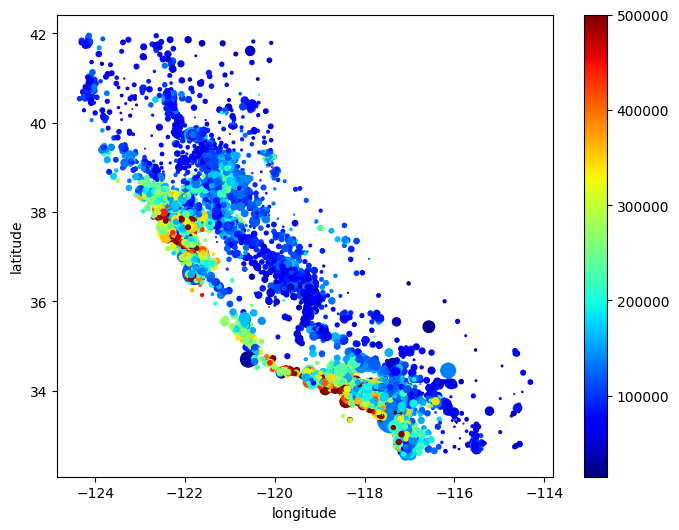

In [ ]:
fig =plt.figure(figsize= (8,6))
ax1 =plt.subplot(1,1,1)
plt.scatter(housing['longitude'],housing['latitude'], s=housing['population']/100, c=housing['median_house_value'], cmap='jet')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar()
plt.show()

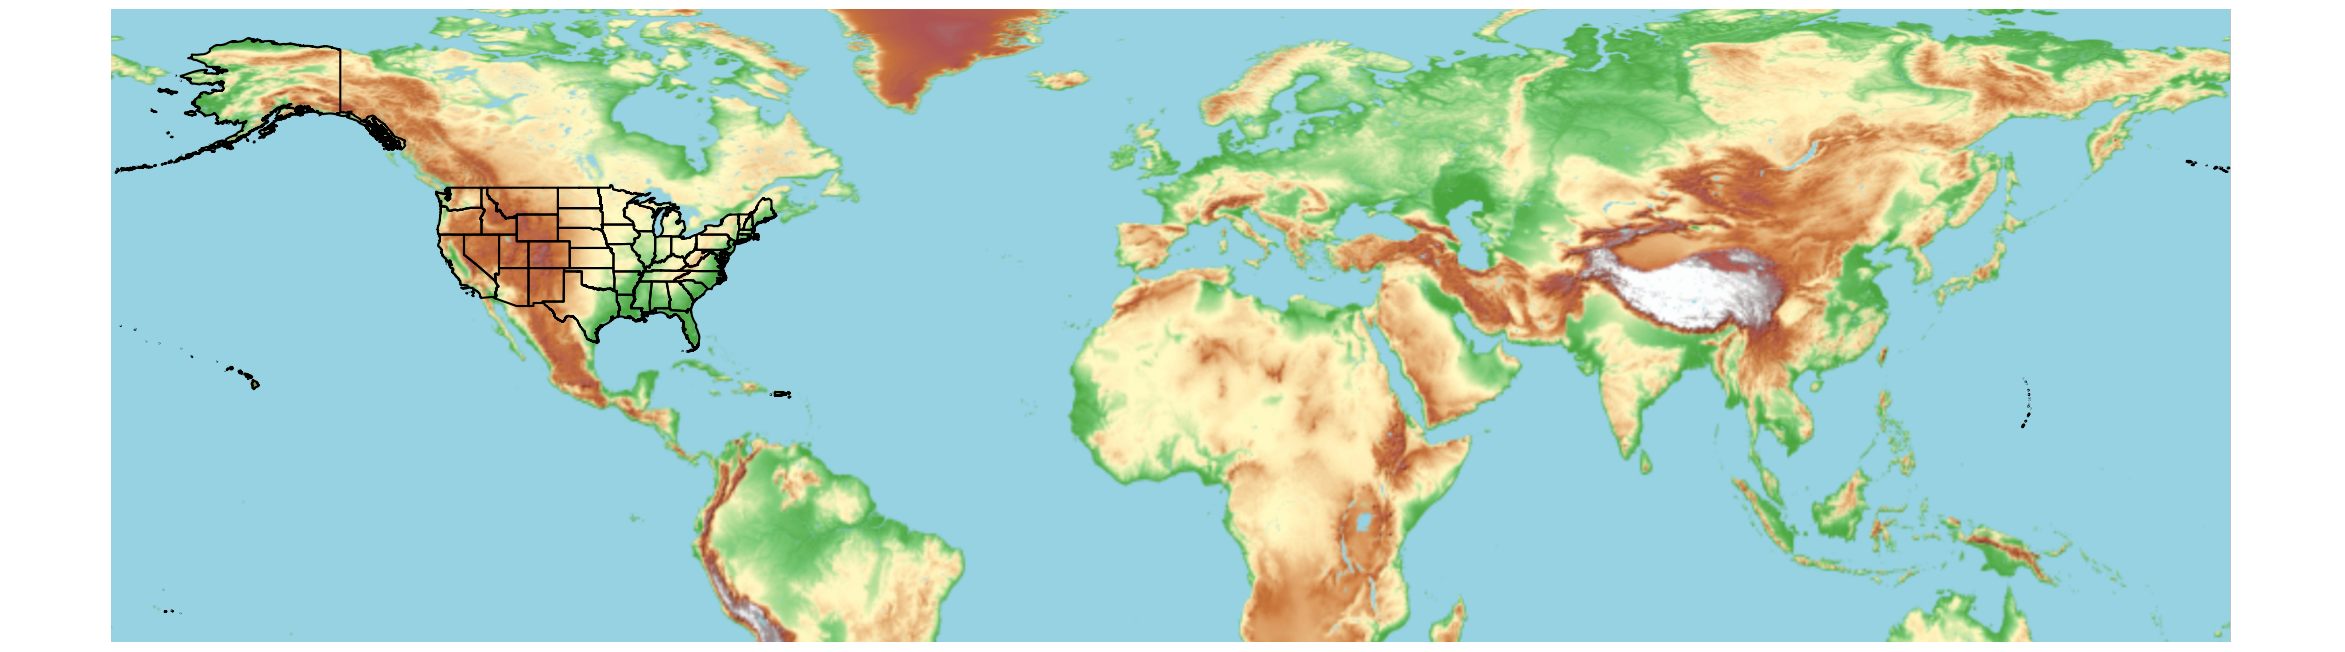

In [ ]:
from inspect import Attribute
#now lets plot the US map:
fig =plt.figure(figsize=(30,25))
ax1=plt.subplot(1,1,1)
us_gdf.boundary.plot(ax=ax1, color="black")
cx.add_basemap(ax=ax1,crs=us_gdf.crs,attribution="", source=cx.providers.OpenTopoMap)
plt.axis(False)
plt.show()




# Discover and Visualize the Data to Gain Insights

In [ ]:
# we we need to plot the CA map for which we need to extract the CA data as following:

ca_gdf = us_gdf.loc[["CA"]]
ca_gdf

STATEFP   STATENS      GEOIDFQ GEOID STUSPS        NAME LSAD  \
STUSPS                                                                
CA          06  01779778  0400000US06    06     CA  California   00   

               ALAND       AWATER  \
STUSPS                              
CA      403673296401  20291770234   

                                                 geometry  
STUSPS                                                     
CA      MULTIPOLYGON (((-118.60442 33.47855, -118.5987...

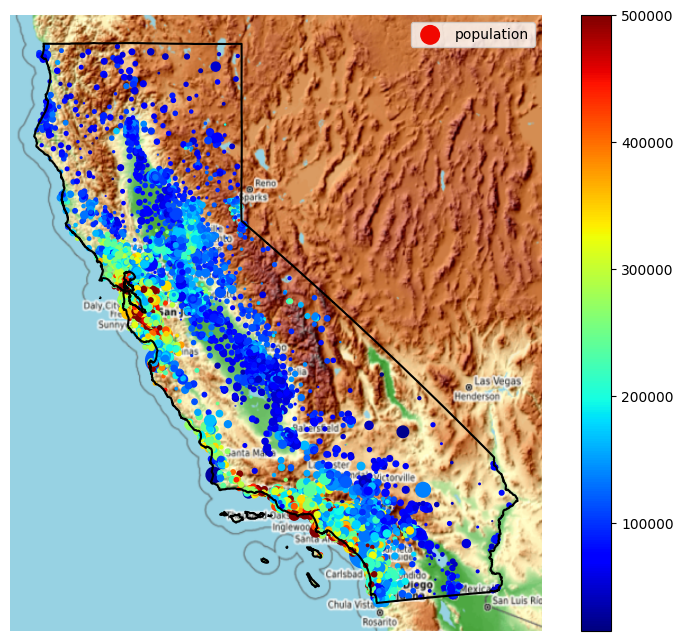

In [ ]:
fig =plt.figure(figsize=(10,8))
ax1=plt.subplot(1,1,1)
ca_gdf.boundary.plot(ax=ax1, color="black")
cx.add_basemap(ax=ax1,crs=ca_gdf.crs,attribution="", source=cx.providers.OpenTopoMap)
plt.scatter(housing['longitude'],housing['latitude'], s=housing['population']/100, c=housing['median_house_value'], cmap='jet', label='population')
plt.legend()
plt.colorbar()
plt.axis(False)
plt.show()

# Prepare the Data for Machine Learning Algorithms

Let's revert to the original training set and separate the target (note that `strat_train_set.drop()` creates a copy of `strat_train_set` without the column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`):

In [ ]:
# To clean the data, we can have the following strategies:
#Process the missing values,
#Drop the colums that include missing values (which is nto a good idea ad it removes the whole column)
#Drop the row (We will use this approach here)
#Fill the values with mean, median (If we would like use this strategy we need to have a valid justification for it)


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.dropna(subset=["total_bedrooms"], axis = 0)  #axis = 0 means we need to delete the rows with missing values. applying the drop function creates a new dataset, the orriginal data still has missing values.

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20433 rows x 10 columns]

In [ ]:
#if we want to drop the column with missing value, the we put the axis = 1
housing.drop(["total_bedrooms"], axis = 1)

longitude  latitude  housing_median_age  total_rooms  population  \
0        -122.23     37.88                41.0        880.0       322.0   
1        -122.22     37.86                21.0       7099.0      2401.0   
2        -122.24     37.85                52.0       1467.0       496.0   
3        -122.25     37.85                52.0       1274.0       558.0   
4        -122.25     37.85                52.0       1627.0       565.0   
...          ...       ...                 ...          ...         ...   
20635    -121.09     39.48                25.0       1665.0       845.0   
20636    -121.21     39.49                18.0        697.0       356.0   
20637    -121.22     39.43                17.0       2254.0      1007.0   
20638    -121.32     39.43                18.0       1860.0       741.0   
20639    -121.24     39.37                16.0       2785.0      1387.0   

       households  median_income  median_house_value ocean_proximity  
0           126.0         8.3252            452600.0        NEAR BAY  
1          1138.0         8.3014            358500.0        NEAR BAY  
2           177.0         7.2574            352100.0        NEAR BAY  
3           219.0         5.6431            341300.0        NEAR BAY  
4           259.0         3.8462            342200.0        NEAR BAY  
...           ...            ...                 ...             ...  
20635       330.0         1.5603             78100.0          INLAND  
20636       114.0         2.5568             77100.0          INLAND  
20637       433.0         1.7000             92300.0          INLAND  
20638       349.0         1.8672             84700.0          INLAND  
20639       530.0         2.3886             89400.0          INLAND  

[20640 rows x 9 columns]

In [ ]:
#Fill the values with mean, median, the third strategy
# let us fill the null values with average

avg = housing["total_bedrooms"].mean()
avg



537.8705525375618

In [ ]:
housing["total_bedrooms"].fillna(avg)

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [ ]:
#for our project we use the first strategy ( dorping the rows with null values)
housing.dropna(subset=["total_bedrooms"], axis = 0, inplace=True) # inplace=True bring changes in the original dataset.
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Separating out the numerical attributes to use the `"median"` strategy (as it cannot be calculated on text attributes like `ocean_proximity`):

## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:
preparing the data for a machine learning model. Specifically categorical feature "ocean_proximity"

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
housing["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [ ]:
# As we can see, the ocean_proximity column is string, we need to change it to intiger, unsing the ordinaryencoder and onehotencoder
# we use ordinaryencoder if the o_c is in order, if not we use onehotencoder. So in our case we use orndinaryencoder

In [ ]:
vc = housing["ocean_proximity"].value_counts()
vc

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [ ]:
#OrdinaryEncoder
ordinal_encoder = OrdinalEncoder()   # Now let us ask it to learn from data


In [ ]:
ordinal_encoder.fit(housing[["ocean_proximity"]])

OrdinalEncoder()

In [ ]:
#Let us see what is inside our encoder
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
#Let us transform it. this can catagorize our data from 0 to 4
ordinal_encoder.transform(housing[["ocean_proximity"]])

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
#if we use onehotencoder we will have five column because we have fieve catagories. for each column the value in each cell can 0 and 1
#And we use this becase our data is not in order
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(housing[["ocean_proximity"]])

OneHotEncoder()

In [ ]:
X_P1= onehot_encoder.transform(housing[["ocean_proximity"]]).toarray()
X_P1
#By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()
 # so, we will use it and let us to save it

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
onehot_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
# create a data fram
X_P1_df = pd.DataFrame(X_P1, columns=onehot_encoder.get_feature_names_out(), index=housing[["ocean_proximity"]].index)
X_P1_df

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
20635                        0.0                     1.0   
20636                        0.0                     1.0   
20637                        0.0                     1.0   
20638                        0.0                     1.0   
20639                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
...                       ...                       ...   
20635                     0.0                       0.0   
20636                     0.0                       0.0   
20637                     0.0                       0.0   
20638                     0.0                       0.0   
20639                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
20635                         0.0  
20636                         0.0  
20637                         0.0  
20638                         0.0  
20639                         0.0  

[20433 rows x 5 columns]

In [ ]:
#Now let us combine our data frams into one
housing_df = pd.merge(left=housing, right=X_P1_df, left_index=True, right_index=True)
housing_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0            NEAR BAY                        0.0                     0.0   
1            NEAR BAY                        0.0                     0.0   
2            NEAR BAY                        0.0                     0.0   
3            NEAR BAY                        0.0                     0.0   
4            NEAR BAY                        0.0                     0.0   
...               ...                        ...                     ...   
20635          INLAND                        0.0                     1.0   
20636          INLAND                        0.0                     1.0   
20637          INLAND                        0.0                     1.0   
20638          INLAND                        0.0                     1.0   
20639          INLAND                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
...                       ...                       ...   
20635                     0.0                       0.0   
20636                     0.0                       0.0   
20637                     0.0                       0.0   
20638                     0.0                       0.0   
20639                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
20635                         0.0  
20636                         0.0  
20637                         0.0  
20638                         0.0  
20639                         0.0  

[20433 rows x 15 columns]

## Splitting train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(housing_df, test_size=0.2, stratify= housing_df["ocean_proximity"])
train_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5231     -121.36     37.99                 8.0       1801.0           380.0   
20534    -122.33     38.38                28.0       1020.0           169.0   
14949    -117.14     32.80                41.0       2423.0           469.0   
7924     -122.26     38.31                33.0       4518.0           704.0   
11076    -123.21     39.18                17.0       2772.0           576.0   
...          ...       ...                 ...          ...             ...   
20116    -123.13     40.85                18.0       1650.0           377.0   
11054    -117.94     34.15                33.0        859.0           144.0   
16299    -122.51     37.53                17.0       1574.0           262.0   
7261     -118.26     34.04                 6.0       1529.0           566.0   
20235    -118.35     34.07                52.0       2497.0           406.0   

       population  households  median_income  median_house_value  \
5231        684.0       350.0         4.2589            134900.0   
20534       504.0       164.0         4.5694            287500.0   
14949      1813.0       466.0         2.1157            156900.0   
7924       1776.0       669.0         5.2444            281100.0   
11076      1501.0       584.0         2.6275            142100.0   
...           ...         ...            ...                 ...   
20116       675.0       282.0         1.8933             84700.0   
11054       421.0       138.0         4.4821            220100.0   
16299       672.0       241.0         7.2929            355800.0   
7261       1051.0       473.0         2.4620            162500.0   
20235      1030.0       412.0         4.8900            500001.0   

      ocean_proximity  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
5231           INLAND                        0.0                     1.0   
20534          INLAND                        0.0                     1.0   
14949      NEAR OCEAN                        0.0                     0.0   
7924         NEAR BAY                        0.0                     0.0   
11076       <1H OCEAN                        1.0                     0.0   
...               ...                        ...                     ...   
20116          INLAND                        0.0                     1.0   
11054          INLAND                        0.0                     1.0   
16299      NEAR OCEAN                        0.0                     0.0   
7261        <1H OCEAN                        1.0                     0.0   
20235       <1H OCEAN                        1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
5231                      0.0                       0.0   
20534                     0.0                       0.0   
14949                     0.0                       0.0   
7924                      0.0                       1.0   
11076                     0.0                       0.0   
...                       ...                       ...   
20116                     0.0                       0.0   
11054                     0.0                       0.0   
16299                     0.0                       0.0   
7261                      0.0                       0.0   
20235                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
5231                          0.0  
20534                         0.0  
14949                         1.0  
7924                          0.0  
11076                         0.0  
...                           ...  
20116                         0.0  
11054                         0.0  
16299                         1.0  
7261                          0.0  
20235                         0.0  

[16346 rows x 15 columns]

## Feature Scaling

In [ ]:
# Here I would explian two methods: min max scaler and stadard scaler
#Some Rules:
#Scale: most of the time, we should scale on X (features).
#Learn (fit) from the train data.
#Apply transfom to both train and test data.

In [ ]:
# min max:  (x-min)/(max-min) [0,1]
# standard: normal distribution (x-mean)/std_deviation [-3,3]

In [ ]:
# let us specify our x_train data first and for this we do not consider the hot encoder columns that we created before, we will just use the first 8 columns.
train_df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
X_P1_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']  # median_house_value will by our Y, so for the first part we considered the first 8 columns


In [ ]:
X_train_P1 = train_df[X_P1_columns]
X_train_P1

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5231     -121.36     37.99                 8.0       1801.0           380.0   
20534    -122.33     38.38                28.0       1020.0           169.0   
14949    -117.14     32.80                41.0       2423.0           469.0   
7924     -122.26     38.31                33.0       4518.0           704.0   
11076    -123.21     39.18                17.0       2772.0           576.0   
...          ...       ...                 ...          ...             ...   
20116    -123.13     40.85                18.0       1650.0           377.0   
11054    -117.94     34.15                33.0        859.0           144.0   
16299    -122.51     37.53                17.0       1574.0           262.0   
7261     -118.26     34.04                 6.0       1529.0           566.0   
20235    -118.35     34.07                52.0       2497.0           406.0   

       population  households  median_income  
5231        684.0       350.0         4.2589  
20534       504.0       164.0         4.5694  
14949      1813.0       466.0         2.1157  
7924       1776.0       669.0         5.2444  
11076      1501.0       584.0         2.6275  
...           ...         ...            ...  
20116       675.0       282.0         1.8933  
11054       421.0       138.0         4.4821  
16299       672.0       241.0         7.2929  
7261       1051.0       473.0         2.4620  
20235      1030.0       412.0         4.8900  

[16346 rows x 8 columns]

In [ ]:
# now let us specify the second part, the catagorical part
X_P2_columns = ['ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [ ]:
X_train_P2 = train_df[X_P2_columns]
X_train_P2

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
5231                         0.0                     1.0   
20534                        0.0                     1.0   
14949                        0.0                     0.0   
7924                         0.0                     0.0   
11076                        1.0                     0.0   
...                          ...                     ...   
20116                        0.0                     1.0   
11054                        0.0                     1.0   
16299                        0.0                     0.0   
7261                         1.0                     0.0   
20235                        1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
5231                      0.0                       0.0   
20534                     0.0                       0.0   
14949                     0.0                       0.0   
7924                      0.0                       1.0   
11076                     0.0                       0.0   
...                       ...                       ...   
20116                     0.0                       0.0   
11054                     0.0                       0.0   
16299                     0.0                       0.0   
7261                      0.0                       0.0   
20235                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
5231                          0.0  
20534                         0.0  
14949                         1.0  
7924                          0.0  
11076                         0.0  
...                           ...  
20116                         0.0  
11054                         0.0  
16299                         1.0  
7261                          0.0  
20235                         0.0  

[16346 rows x 5 columns]

In [ ]:
y_train = train_df["median_house_value"]
y_train

5231     134900.0
20534    287500.0
14949    156900.0
7924     281100.0
11076    142100.0
           ...   
20116     84700.0
11054    220100.0
16299    355800.0
7261     162500.0
20235    500001.0
Name: median_house_value, Length: 16346, dtype: float64

In [ ]:
X_test = test_df[X_P1_columns]
X_test

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20385    -121.37     38.62                43.0       1077.0           199.0   
7320     -122.59     38.58                18.0       3753.0           752.0   
3603     -122.34     37.95                39.0       1986.0           427.0   
1222     -117.11     32.82                17.0       1787.0           330.0   
11851    -122.02     38.02                44.0       1465.0           247.0   
...          ...       ...                 ...          ...             ...   
17209    -119.04     35.35                31.0       1607.0           336.0   
20609    -121.56     39.11                18.0       2171.0           480.0   
20124    -117.41     34.58                14.0        859.0           212.0   
7403     -122.06     37.32                30.0       3033.0           540.0   
14985    -120.84     38.77                11.0       1013.0           188.0   

       population  households  median_income  
20385       447.0       182.0         3.0139  
7320       1454.0       668.0         3.7585  
3603       1041.0       385.0         3.2333  
1222       1341.0       314.0         2.8750  
11851       817.0       237.0         4.8693  
...           ...         ...            ...  
17209       817.0       307.0         2.5644  
20609      1527.0       447.0         2.3011  
20124       541.0       181.0         1.6838  
7403       1440.0       507.0         6.2182  
14985       410.0       158.0         4.8250  

[4087 rows x 8 columns]

In [ ]:
X_test_P2 = test_df[X_P2_columns]
X_test_P2

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
20385                        0.0                     1.0   
7320                         1.0                     0.0   
3603                         0.0                     0.0   
1222                         0.0                     0.0   
11851                        0.0                     0.0   
...                          ...                     ...   
17209                        0.0                     1.0   
20609                        0.0                     1.0   
20124                        0.0                     1.0   
7403                         1.0                     0.0   
14985                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
20385                     0.0                       0.0   
7320                      0.0                       0.0   
3603                      0.0                       1.0   
1222                      0.0                       0.0   
11851                     0.0                       1.0   
...                       ...                       ...   
17209                     0.0                       0.0   
20609                     0.0                       0.0   
20124                     0.0                       0.0   
7403                      0.0                       0.0   
14985                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
20385                         0.0  
7320                          0.0  
3603                          0.0  
1222                          1.0  
11851                         0.0  
...                           ...  
17209                         0.0  
20609                         0.0  
20124                         0.0  
7403                          0.0  
14985                         0.0  

[4087 rows x 5 columns]

In [ ]:
y_test = test_df["median_house_value"]
y_test

20385    115600.0
7320     185700.0
3603     135100.0
1222     112500.0
11851    156900.0
           ...   
17209     73000.0
20609     57500.0
20124     57900.0
7403     380800.0
14985    184600.0
Name: median_house_value, Length: 4087, dtype: float64

# Select and Train a Model

## Training and Evaluating on the Training Set

In [ ]:
#So, we got our values and now let us train the model:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X_train_P1)


MinMaxScaler()

Let's try the full preprocessing pipeline on a few training instances:

Compare against the actual values:

In [ ]:
X_train_P1_scaled = minmax_scaler.transform(X_train_P1)


In [ ]:
minmax_scaler.transform(X_test)

array([[0.29681275, 0.64612115, 0.82352941, ..., 0.02723592, 0.03378757,
        0.17337692],
       [0.1752988 , 0.64187035, 0.33333333, ..., 0.08900748, 0.12450999,
        0.22472793],
       [0.2001992 , 0.5749203 , 0.74509804, ..., 0.06367317, 0.07168191,
        0.18850774],
       ...,
       [0.69123506, 0.21679065, 0.25490196, ..., 0.03300209, 0.0336009 ,
        0.08164715],
       [0.22808765, 0.50797024, 0.56862745, ..., 0.08814869, 0.09445585,
        0.39436008],
       [0.34960159, 0.66206164, 0.19607843, ..., 0.02496626, 0.02930745,
        0.29827864]])

In [ ]:
# As explained earlier, we are not going to use the minmax scaler. In this porject we use the standard scaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train_P1)

StandardScaler()

In [ ]:
# Because we use this method, let us apply and save it:
X_train_P1_scaled = standard_scaler.transform(X_train_P1)
X_train_P1_scaled

#and pringing this we will see most of the values are between 3 and -3


array([[-0.89283139,  1.10436393, -1.64143972, ..., -0.6794491 ,
        -0.39430576,  0.20362128],
       [-1.37589809,  1.2868202 , -0.05000376, ..., -0.84421548,
        -0.88461269,  0.36714234],
       [ 1.20875775, -1.32370791,  0.98442961, ...,  0.35400228,
        -0.08852294, -0.92506908],
       ...,
       [-1.46553933,  0.88915911, -0.92529354, ..., -0.69043352,
        -0.68163617,  1.80144067],
       [ 0.65099002, -0.74359055, -1.80058332, ..., -0.34350875,
        -0.07007053, -0.74269437],
       [ 0.6061694 , -0.72955545,  1.85971939, ..., -0.36273149,
        -0.23087011,  0.53598246]])

In [ ]:
X_test_P1_scaled = standard_scaler.transform(X_test)


In [ ]:
#Now we are ready to slect machine learning model and train it.
#But before that we need to connect the features togather: or to cmpbain the part1 and part2 togather:

X_train = np.hstack([X_train_P1_scaled, X_train_P2. to_numpy()])
X_train.shape




(16346, 13)

In [ ]:
X_test = np.hstack([X_test_P1_scaled, X_test_P2.to_numpy()])
X_test.shape

(4087, 13)

In [ ]:
#Now we can create severa models: here we create a reggression model becasue we need to predict the median house value which is continuous number
#First we will use linear reggression:
from sklearn.linear_model import LinearRegression
l_m = LinearRegression(n_jobs=-1)
l_m.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
#After building the model, let us varify the results
y_test_lm_pred = l_m.predict(X_test)
y_test_lm_pred

array([131852.8900752 , 231243.98675866, 218091.95544456, ...,
        45366.58560448, 333170.97072183, 149337.06983711])

In [ ]:
test_df['linear'] = y_test_lm_pred/y_test-1

In [ ]:
# we predicted the value, no how we measure to know if it is good or bad? No we use square errors
from sklearn.metrics import mean_squared_error
lm_rmsc = mean_squared_error(y_true=y_test, y_pred=y_test_lm_pred)
lm_rmsc


4969943836.149107

In [ ]:
#let us calculate the error ratio:
y_test_lm_pred/y_test-1 # this means the proce here is higher by (0.14) or 14% that the ground throuth. - lower, + higher

20385    0.140596
7320     0.245256
3603     0.614300
1222     0.385082
11851    0.676582
           ...   
17209    0.724250
20609    0.051140
20124   -0.216467
7403    -0.125076
14985   -0.191023
Name: median_house_value, Length: 4087, dtype: float64

In [ ]:
#Now we can clacute the absolut value and its avrage. this can give is more cleare idea bout or models error:
np.average(np.abs(y_test_lm_pred/y_test-1))

0.2947417310747705

In [ ]:
#So our linear model has 29% error

The MSE value of 4969943836.149107 in the context of our housing price prediction model.

Interpretation of MSE:

Magnitude: The MSE value is quite large. This suggests that, on average, the squared difference between our model's predicted housing prices and the actual housing prices is substantial.
Units: We must remember that MSE is expressed in squared units of our target variable. In this case, it's squared dollars (since we're predicting house values).
Desirability: Generally, a lower MSE is preferred, as it indicates better model accuracy. A very high MSE like this one suggests that the model's predictions could be significantly off from the actual values.

In conclusion: While the high MSE suggests the model is not performing optimally, it's not necessarily a dead end. By systematically exploring improvements in feature engineering, model selection, and hyperparameter tuning, we can likely achieve better predictive accuracy.

In [ ]:
#Let us build anathor model
from sklearn.tree import DecisionTreeRegressor
dt_m = DecisionTreeRegressor()
dt_m.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_test_treem_predected = dt_m.predict(X_test)

treem_rmsc = mean_squared_error(y_true=y_test, y_pred=y_test_treem_predected)
treem_rmsc


4816919947.19036

In [ ]:
np.average(np.abs(y_test_treem_predected/y_test-1))

0.2374494908158694

In [ ]:
test_df['Decission Tree'] = y_test_treem_predected/y_test-1

In [ ]:
# we can also build a KNeighborsRegression
from sklearn.neighbors import KNeighborsRegressor
knn_m = KNeighborsRegressor()
knn_m.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
#Lets make predictin for this model:
y_test_knn_predected = knn_m.predict(X_test)

knn_rmsc = mean_squared_error(y_true=y_test, y_pred=y_test_knn_predected)
knn_rmsc


3813762723.492351

In [ ]:
test_df['KNN'] = y_test_knn_predected/y_test-1

In [ ]:
np.average(np.abs(y_test_knn_predected/y_test-1))

0.22756127026740677

In [ ]:
#Let us build Rondomforest model:
from sklearn.ensemble import RandomForestRegressor
rf_m = RandomForestRegressor()
rf_m.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Let us make prediction for this model:
y_test_rf_predected = rf_m.predict(X_test)

rf_rmsc = mean_squared_error(y_true=y_test, y_pred=y_test_rf_predected)
rf_rmsc

2366839343.255092

In [ ]:
test_df['Random Forest'] = y_test_rf_predected/y_test-1

In [ ]:
np.average(np.abs(y_test_rf_predected/y_test-1))

0.17793944336971376

In [ ]:
# RF model looks much better with minimum erro comparing to all other models we observed.

In [ ]:
#Our last model Svr
from sklearn.svm import SVR
svr_m = SVR()
svr_m.fit(X_train, y_train)

SVR()

In [ ]:
y_test_srvm_pred = svr_m.predict(X_test)
svrm_rmsc = mean_squared_error(y_true=y_test, y_pred=y_test_srvm_pred)
svrm_rmsc

14104956534.654736

In [ ]:
test_df['SVR'] = y_test_srvm_pred/y_test-1

In [ ]:
np.average(np.abs(SVR_pred/y_test-1))

0.5291344129712162

## Better Evaluation Using Cross-Validation

this is another way to check if a model is good or bad, but it will take too much time because it will create several model.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lm_C_rmsc = -cross_val_score(l_m, X_train, y_train, scoring="neg_mean_squared_error", cv=10) # we put a (_) at the bgining of the code to deal with the neg in "neg"_mean_squared..)
lm_C_rmsc

array([4.78899632e+09, 4.60315653e+09, 4.60036685e+09, 4.48785698e+09,
       5.06802965e+09, 4.95085257e+09, 4.46552747e+09, 4.66734787e+09,
       4.55737710e+09, 4.49044276e+09])

In [ ]:
lm_C_rmsc.mean()

4667995410.170768

## Visualizing the models

In [ ]:
test_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20385    -121.37     38.62                43.0       1077.0           199.0   
7320     -122.59     38.58                18.0       3753.0           752.0   
3603     -122.34     37.95                39.0       1986.0           427.0   
1222     -117.11     32.82                17.0       1787.0           330.0   
11851    -122.02     38.02                44.0       1465.0           247.0   
...          ...       ...                 ...          ...             ...   
17209    -119.04     35.35                31.0       1607.0           336.0   
20609    -121.56     39.11                18.0       2171.0           480.0   
20124    -117.41     34.58                14.0        859.0           212.0   
7403     -122.06     37.32                30.0       3033.0           540.0   
14985    -120.84     38.77                11.0       1013.0           188.0   

       population  households  median_income  median_house_value  \
20385       447.0       182.0         3.0139            115600.0   
7320       1454.0       668.0         3.7585            185700.0   
3603       1041.0       385.0         3.2333            135100.0   
1222       1341.0       314.0         2.8750            112500.0   
11851       817.0       237.0         4.8693            156900.0   
...           ...         ...            ...                 ...   
17209       817.0       307.0         2.5644             73000.0   
20609      1527.0       447.0         2.3011             57500.0   
20124       541.0       181.0         1.6838             57900.0   
7403       1440.0       507.0         6.2182            380800.0   
14985       410.0       158.0         4.8250            184600.0   

      ocean_proximity  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
20385          INLAND                        0.0                     1.0   
7320        <1H OCEAN                        1.0                     0.0   
3603         NEAR BAY                        0.0                     0.0   
1222       NEAR OCEAN                        0.0                     0.0   
11851        NEAR BAY                        0.0                     0.0   
...               ...                        ...                     ...   
17209          INLAND                        0.0                     1.0   
20609          INLAND                        0.0                     1.0   
20124          INLAND                        0.0                     1.0   
7403        <1H OCEAN                        1.0                     0.0   
14985          INLAND                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
20385                     0.0                       0.0   
7320                      0.0                       0.0   
3603                      0.0                       1.0   
1222                      0.0                       0.0   
11851                     0.0                       1.0   
...                       ...                       ...   
17209                     0.0                       0.0   
20609                     0.0                       0.0   
20124                     0.0                       0.0   
7403                      0.0                       0.0   
14985                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN    linear  Decission Tree       KNN  \
20385                         0.0  0.140596        136600.0 -0.034256   
7320                          0.0  0.245256        172600.0  0.147227   
3603                          0.0  0.614300        112700.0  0.321984   
1222                          1.0  0.385082        145800.0  0.139911   
11851                         0.0  0.676582        196200.0  0.434162   
...                           ...       ...             ...       ...   
17209                         0.0  0.724250         82800.0 -0.218082   
20609                         0.0  

In [ ]:
#Frist we prepare our geopandas data for visualization
test_housing_gdf = gpd.GeoDataFrame(test_df, geometry=gpd.points_from_xy(test_df["longitude"], test_df["latitude"]), crs=ca_gdf.crs)


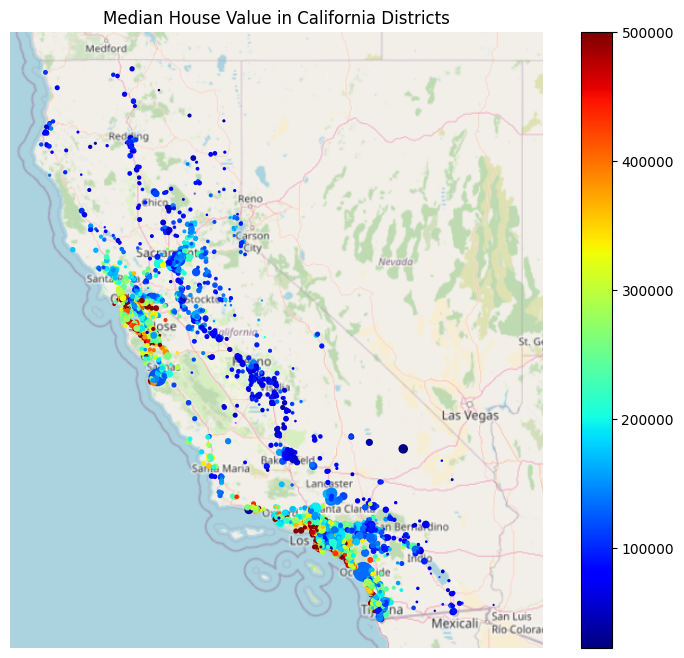

In [ ]:

# let us copy our CA map and show our relsult on it
fig =plt.figure(figsize=(10,8))
ax1=plt.subplot(1,1,1)
ca_gdf.boundary.plot(ax=ax1, color="none")
cx.add_basemap(ax=ax1,crs=us_gdf.crs,attribution="", source=cx.providers.OpenStreetMap.Mapnik)
test_housing_gdf.plot(ax=ax1, markersize = test_housing_gdf["population"]/200, column=test_housing_gdf["median_house_value"], cmap=plt.cm.jet, legend=True)
plt.axis(False)


plt.axis(False)
plt.title("Median House Value in California Districts")  # Adding a title
plt.savefig("test_housing_gdf.png", dpi=600) #Fixed: Changed 'savfig' to 'savefig'


#To save this picture - This line is redundant as the figure is already saved above. you may remove it.
#plt.savfig("test_housing_gdf.png", dpi=600)
plt.show()


In [ ]:
#Let us explore our map further
test_housing_gdf.explore(column=test_housing_gdf["median_house_value"], cmap="jet", legend=True)

The final exploratory map effectively visualizes the predicted median house values across California districts, using a color gradient to represent the price range. It allows for interactive exploration, enabling users to zoom in and out, pan across the map, and hover over individual points to see specific details like location and predicted value. This interactive feature provides a powerful tool for understanding the geographical distribution of housing prices and identifying potential hotspots or areas of interest in the California housing market."

.

## Conclusion

This project provided a comprehensive exploration of predicting median house values in California districts using machine learning. By applying a systematic approach encompassing data exploration, preparation, model training, evaluation, and visualization, we gained valuable insights into the housing market.

The Random Forest Regression model emerged as the most effective among the tested models, demonstrating promising predictive capabilities. The geographical visualization highlighted spatial patterns in housing prices, revealing potential influencing factors such as proximity to urban centers and coastal areas.

While the achieved results are encouraging, further research and model refinements could enhance predictive accuracy. This could involve hyperparameter tuning, feature engineering, or integrating external datasets to incorporate additional relevant information.

Overall, this project demonstrates the potential of machine learning for data-driven decision-making in the real estate domain. By leveraging the insights gained, stakeholders can make more informed choices regarding property valuations, investment strategies, and market analysis.

**Mohammad Jawad Nayosh**
